In [ ]:
!pip install -q clip-retrieval img2dataset

In [ ]:
import glob
import pandas as pd
import random
import re
import matplotlib.pyplot as plt
import math

In [13]:
!unzip -q data.zip

In [84]:
ds = []
image_list_path = 'df.csv'
for e in glob.glob('./data/*.png'):
  ds.append({
      'url': "file://"+os.path.abspath(e),
      'caption': open(os.path.abspath(e).replace(".png", ".txt")).read()
  })
pd.DataFrame(ds).to_csv(image_list_path)

In [101]:
!head $image_list_path

,url,caption
0,file:///content/data/flawlesssaphire_graphic.png,"Recipe: Portal to Matron's Den
Cube Recipe
1
Key of Hate
1
Key of Terror
1
Key of Destruction
Produces:


In [104]:
!img2dataset --url_list=$image_list_path --output_folder=image_folder \
  --thread_count=64 --image_size=256 --input_format=csv --caption_col=caption --url_col=url

Loading the input file
Splitting the 1176 samples in 1 shards of size 10000
Done sharding the input file
Starting the downloading of this file
  0% 0/1 [00:00<?, ?it/s]worker  - success: 0.884 - failed to download: 0.000 - failed to resize: 0.116 - images per sec: 295 - count: 1176
total   - success: 0.884 - failed to download: 0.000 - failed to resize: 0.116 - images per sec: 293 - count: 1176
100% 1/1 [00:03<00:00,  3.99s/it]


In [108]:
!cat ./image_folder/00000/000000213.json

{
    "caption": "Arcane Sanctuary\nAct 2 Open Area\nArea level Normal: 14\nArea level Nightmare: 48\nArea level Hell: 79\nHas Waypoint: Yes\nEntered from:\nPalace Cellar Level 3\nLeads to:\nCanyon of the Magi",
    "url": "file:///content/data/act1-barracks_graphic.png",
    "key": "000000213",
    "status": "success",
    "error_message": null,
    "width": 256,
    "height": 256,
    "exif": "{}",
    "original_width": 200,
    "original_height": 200
}

In [110]:
!clip-retrieval inference --input_dataset image_folder --output_folder embeddings_folder --num_prepro_workers 2

1280it [04:41,  4.55it/s]


In [ ]:
!clip-retrieval index embeddings_folder index_folder

In [ ]:
def is_square(integer):
    root = math.sqrt(integer)
    return integer == int(root + 0.5) ** 2

In [207]:
QUERY='"Helm, Shako, Green, Level 63"'
OUT='q_dir'
N_RESULT=9
if not is_square(N_RESULT):
  raise Exception("Pick a square N_RESULT")
!rm -rf $OUT
!clip-retrieval filter --query $QUERY --num_results=$N_RESULT --output_folder $OUT --indice_folder index_folder

Found 9 items with query 'Helm, Shako, Green, Level 63'
The minimum distance is 0.29 and the maximum is 0.31
You may want to use these numbers to increase your --num_results parameter. Or use the --threshold parameter.
Copying the images in q_dir


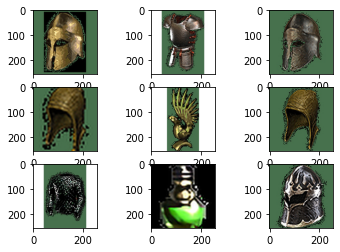

In [208]:
random_images = [os.path.abspath(OUT+'/'+e) for e in random.sample(os.listdir(OUT), N_RESULT)]
sqrt_n_result = int(math.sqrt(N_RESULT))
f, axarr = plt.subplots(sqrt_n_result, sqrt_n_result)
curr_row = 0
for index, f in enumerate(random_images):
     a = plt.imread(f)

     # find the column by taking the current index modulo 3
     col = index % sqrt_n_result
     # plot on relevant subplot
     axarr[col, curr_row].imshow(a)
     if col == 2:
         # we have finished the current row, so increment row counter
         curr_row += 1